In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:

# 📌 Load Dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Target variable (diabetes progression)

In [12]:
# 📌 Train-Test Split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [13]:

# 📌 Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:

# 📌 Train Model (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:

# 📌 Predictions
y_pred = model.predict(X_test_scaled)

# 📌 Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:

print(f"📊 Mean Absolute Error: {mae:.2f}")
print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"🎯 R2 Score: {r2:.2f}")

📊 Mean Absolute Error: 42.79
📉 Mean Squared Error: 2900.19
🎯 R2 Score: 0.45


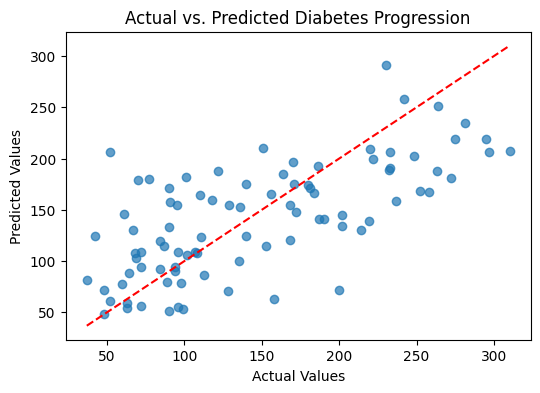

In [17]:

# 📌 Scatter Plot (Actual vs. Predicted)
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Diabetes Progression")
plt.show()